<h1 style="color:rgb(0,120,170)">Assignment 1: k-nearest neighbors</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (with k, potenitially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. All cells have a unique ID so that the unit test can find it, so please do not add or remove any cell!

You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type. In the descriptions for every function you can find information on what datatype an output should have and you should stick to that in order to minimize conflicts with the unittest. Don't import any other packages than listed in the cell with the "imports" tag.

Questions are usually multiple choice (except the task description says otherwise) and can be answered by changing the given variables to either "True" or "False". "None" is counted as a wrong answer in any case!

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest, they won't be available either. If you want to make sure that everything is executable for the unittest, try executing cells/functions individually (instead of running the whole notebook).

<h2 style="color:rgb(0,120,170)">Plagiarism</h2>

Your submissions will be scanned for plagiarism! \
If plagiarism is detected, all involved students will automatically receive 0 points for the whole submission, until further explanation is brought forward to us.

<h2 style="color:rgb(210,90,80)">Task 1: Risk Calulation (10 Points)</h2>

Assume the simple situation of a binary classification task, i.e. $y = \pm 1$, and a 1-dimensional feature $x$, i.e. $d=1$. Moreover, the feature is discrete (categorical) and can only have 3 possible values $x=1,2,3$.

Data is drawn from the following distribution:

\begin{align}
p(x=1,y=+1) &= 0.1\\
p(x=1,y=-1) &= 0.2\\
p(x=2,y=+1) &= 0.2\\
p(x=2,y=-1) &= 0.1\\
p(x=3,y=+1) &= 0.3\\
p(x=3,y=-1) &= 0.1\\
\end{align}

Compute the risk for the 0-1-loss for these two classifiers:

(1) The Bayes-optimal classifier $g_\textrm{opt}$.<br>
(2) A classifier $g_\textrm{dom}$ which always outputs $+1$, i.e. the dominant label, independent of $x$.

For $x=1$:

$P(x=1) = 0.1 + 0.2 = 0.3$
$P(y=+1|x=1) = \frac{0.1}{0.3} = 0.333$
$P(y=-1|x=1) = \frac{0.2}{0.3} = 0.667$
Therefore $g_{opt}(x=1) = -1$

For $x=2$:

$P(x=2) = 0.2 + 0.1 = 0.3$
$P(y=+1|x=2) = \frac{0.2}{0.3} = 0.667$
$P(y=-1|x=2) = \frac{0.1}{0.3} = 0.333$
Therefore $g_{opt}(x=2) = +1$

For $x=3$:

$P(x=3) = 0.3 + 0.1 = 0.4$
$P(y=+1|x=3) = \frac{0.3}{0.4} = 0.75$
$P(y=-1|x=3) = \frac{0.1}{0.4} = 0.25$
Therefore $g_{opt}(x=3) = +1$

The Bayes-optimal classifier risk is:
$R(g_{opt}) = \sum_{x=1}^3 P(x)[P(y=+1|x)L(g_{opt}(x),+1) + P(y=-1|x)L(g_{opt}(x),-1)]$
$R(g_{opt}) = 0.3(0.333 \cdot 1 + 0.667 \cdot 0) + 0.3(0.667 \cdot 0 + 0.333 \cdot 1) + 0.4(0.75 \cdot 0 + 0.25 \cdot 1)$
$R(g_{opt}) = 0.1 + 0.1 + 0.1 = 0.3$

For the dominant classifier (always +1):

$P(y=+1) = 0.1 + 0.2 + 0.3 = 0.6$
$P(y=-1) = 0.2 + 0.1 + 0.1 = 0.4$

$R(g_{dom}) = P(y=-1) = 0.4$

<h2 style="color:rgb(0,120,170)">Task 2: Visualization</h2>

In [2]:
# Nothing to do here - just run this cell!
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.collections import PathCollection
from typing import Callable

In [3]:
# Nothing to do here - just run this cell!
# read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet1.csv', delimiter=';')
X, y = Z[:,:-1], Z[:,-1]

<h3 style="color:rgb(210,90,80)">Plot 2.1 (2 Points):</h3>

Now visualize the data stored in `DataSet1.csv` with a scatter plot.<br>
The first two columns are the features which hold the $x_1$ and $x_2$ coordinates of the data.<br>
The last column provides the labels $y$ ($\pm1$) of the data. Use different colors for different labels.<br>
Always label the axes of all your plots.

In [4]:
def scatter_plot(X: np.ndarray, y: np.ndarray):
    """Creates a scatter-plot for the dataset X with labels y.

    Parameters
    ----------
    X : np.ndarray
        data
    y : np.ndarray
        labels
    """
    # YOUR CODE HERE
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='+1')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='-1')
    
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.title('Dataset Visualization')
    plt.legend()
    plt.grid(True)

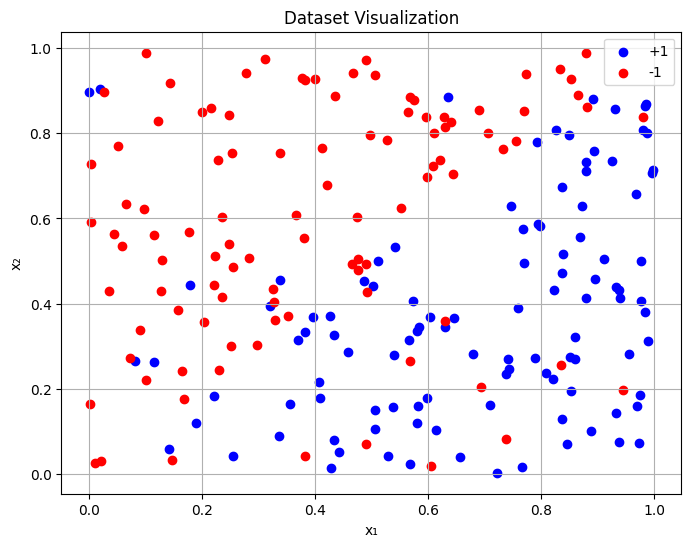

In [5]:
# Nothing to do here - just run this cell!
scatter_plot(X, y)

<h3 style="color:rgb(210,90,80)">Question 2.1 (3 Points):</h3>

***Which of the following statements concerning the distribution of the data are correct:***<br>

a_) The two classes are linearly seperable.<br>
b_) There are no outliers in the data.<br>
c_) Outliers would affect a kNN algorithm when k is small.<br>

To answer the question assign to variables in the next cell "True" or "False" boolean values. 
To earn points, assign values to all variables. Note: Do not reuse these variable names. They are used for testing.

In [6]:
# Examples for you (not the actual solution):
# a_ = True
# b_ = False
# c_ = ...
# You don't have to write any additional code for this question or any question of this type

# YOUR CODE HERE
a_ = False
b_ = False
c_ = True


In [7]:
assert a_ is not None, "Store True/False!"
assert a_ in [True, False], "Invalid Answer!"

In [8]:
assert b_ is not None, "Store True/False!"
assert b_ in [True, False], "Invalid Answer!"

In [9]:
assert c_ is not None, "Store True/False!"
assert c_ in [True, False], "Invalid Answer!"

<h3 style="color:rgb(210,90,80)">Question 2.2 (5 Points):</h3>

***Which of the following statements about $k$-nearest neighbors are correct?***<br>
(Multiple answers might be correct)

d_) requires very long training time already for small data sets <br>
e_) not suited for large datasets<br>
f_) sensitive to the rescaling of individual features (individual dimensions of feature vectors)<br>
g_) has many trainable model parameters <br>
h_) k-NN only allows for classification, not for regression <br>

In [10]:
# YOUR CODE HERE
d_ = False
e_ = True
f_ = True
g_ = False
h_ = False

In [11]:
assert d_ is not None, "Store True/False!"
assert d_ in [True, False], "Invalid Answer!"

In [12]:
assert e_ is not None, "Store True/False!"
assert e_ in [True, False], "Invalid Answer!"

In [13]:
assert f_ is not None, "Store True/False!"
assert f_ in [True, False], "Invalid Answer!"

In [14]:
assert g_ is not None, "Store True/False!"
assert g_ in [True, False], "Invalid Answer!"

In [15]:
assert h_ is not None, "Store True/False!"
assert h_ in [True, False], "Invalid Answer!"

<h2 style="color:rgb(0,120,170)">Task 3: Training the model</h2>

Now we want to put the kNN into action. To this end, work through the following points

* Implement `train_kNN` which fits newly created instance of `KNeighborsClassifier` (`sklearn`) to some training data
* Complete `eval_kNN`such that it outputs the prediction for some input data using a passed classifier
* Program the function `mean_zero_one_loss` that calculates the mean zero-one loss (see lecture slides) of predicted values and samples from the test set
* Put all of these functions together in `run_kNN` to fit a model to training data, make predictions on left-out (test) data and compute the loss for these predictions. To split the dataset into training and test sets, use 10-fold cross validation (CV), loop over all the splits and collect the mean error for each split.

At the end of this task, visualize the mean error for $k \in \{1,3,5,...,177,179\}$ in a plot and answer the following questions.

In [16]:
# Nothing to do here - just run this cell!
from sklearn.model_selection import KFold
from sklearn import neighbors

<h3 style="color:rgb(210,90,80)">Code 3.1 (5 Points):</h3>

In [17]:
def train_kNN(X_train: np.ndarray, y_train: np.ndarray, k: int) -> neighbors.KNeighborsClassifier: 
    """Function that fits a kNN to given data.
    
    Parameters
    ----------
    X_train : np array
        Training data.
    y_train : np array
        Training data labels.
    k : int 
        How many neighbors to consider.

    Returns
    -------
    classifier : neighbors.KNeighborsClassifier
        Classifier that was fitted to the training data.
    """
    # YOUR CODE HERE
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    return classifier

In [18]:
# DO NOT DELETE THIS CELL!
classifier = train_kNN(X,y,3)
assert isinstance(classifier, neighbors.KNeighborsClassifier), "Classifier is not of correct type!"

<h3 style="color:rgb(210,90,80)">Code 3.2 (5 Points):</h3>

In [19]:
def eval_kNN(classifier: neighbors.KNeighborsClassifier, X_eval: np.ndarray) -> np.ndarray: 
    """Function that returns predictions for some input data.

    Parameters
    ----------
    classifier : neighbors.KNeighborsClassifier
        Trained kNN classifier.
    X_eval : np.ndarray
        Data used for predicting the labels.

    Returns
    -------
    predictions : np.ndarray
        Predicted labels.
    """
    # YOUR CODE HERE
    return classifier.predict(X_eval)

In [20]:
# DO NOT DELETE THIS CELL!
assert isinstance(eval_kNN(train_kNN(X, y, 3), X), np.ndarray), "Output is not a numpy array!"

<h3 style="color:rgb(210,90,80)">Code 3.3 (5 Points):</h3>

In [21]:
def mean_zero_one_loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Function that calculates the mean zero-one loss for given true and predicted labels.

    Parameters
    ----------
    y_true : np.ndarray
        True labels.
    y_pred : np.ndarray
        Tredicted labels.

    Returns
    -------
    loss : float
        Mean zero-one loss.
    """
    # YOUR CODE HERE
    return np.mean(y_true != y_pred)

In [22]:
# DO NOT DELETE THIS CELL!
assert mean_zero_one_loss(np.array([1, -1, 1, 1]), np.array([-1, -1, 1, 1])) == 0.25, "Mean Zero-One loss is incorrect!"

<h3 style="color:rgb(210,90,80)">Code 3.4 (5 Points):</h3>

In [23]:
def run_kNN(X: np.ndarray, y: np.ndarray, train_kNN: Callable, eval_kNN: Callable, mean_zero_one_loss: Callable, nf: int, k: int) -> float:
    """Function that combines all previous functions using Cross-Validation.
    
    Parameters
    ----------
    X : np.ndarray
        Training data.
    y : np.ndarray
        Training labels.
    train : Callable
        Function used for training the clf.
    evaluate : Callable
        Function used for evaluating the clf.
    loss_fn : Callable
        Function used for calculating the loss.
    nf : int
        Number of folds for CV
    k : int
        k for kNN algorithm.

    Returns
    -------
    mean_error : float
        Mean error over all folds.
    """
    # YOUR CODE HERE
    kf = KFold(n_splits=nf, shuffle=True, random_state=42)
    errors = []
    
    # Perform k-fold cross validation
    for train_idx, test_idx in kf.split(X):
        # Split data into training and test sets
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Train classifier
        classifier = train_kNN(X_train, y_train, k)
        
        # Get predictions
        y_pred = eval_kNN(classifier, X_test)
        
        # Calculate error
        error = mean_zero_one_loss(y_test, y_pred)
        errors.append(error)
    
    # Return mean error across all folds
    return np.mean(errors)

In [24]:
# DO NOT DELETE THIS CELL!
assert isinstance(run_kNN(X, y, train_kNN, eval_kNN, mean_zero_one_loss, 2, 3), float), "Mean error is not a float!"

In [25]:
# Nothing to do here - just run this cell!
m = range(1, 180, 2)
nf = 10
error_holder = []
for k in m: #range with 179 included and step of 2
    error_holder.append(run_kNN(X, y, train_kNN, eval_kNN, mean_zero_one_loss, nf, k))

<h3 style="color:rgb(210,90,80)">Code 3.5 (2.5 Points):</h3>

In [26]:
def plot_error_vs_k(error_holder: list[float], m: range):
    """Create a plot displaying the error vs the k in kNN.

    Parameters
    ----------
    error_holder : list[float]
        The error list generated above.
    m : range
        Range in the error list (see above)

    Returns
    -------
    Figure
        matplotlib figure object
    """
    # YOUR CODE HERE
    plt.figure(figsize=(10, 6))
    plt.plot(m, error_holder, 'b-', marker='o')
    plt.xlabel('k (number of neighbors)')
    plt.ylabel('Mean Error')
    plt.title('Error vs k in k-NN Classification')
    plt.grid(True)
    return plt.gcf()

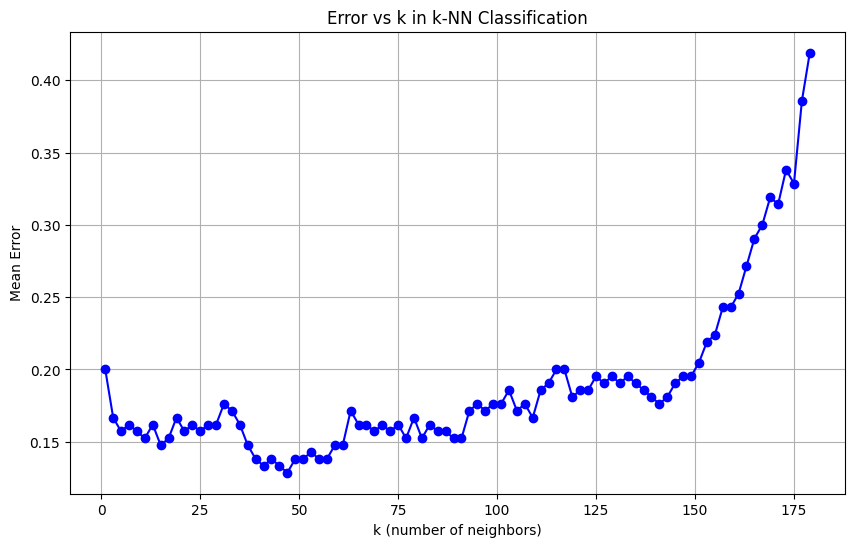

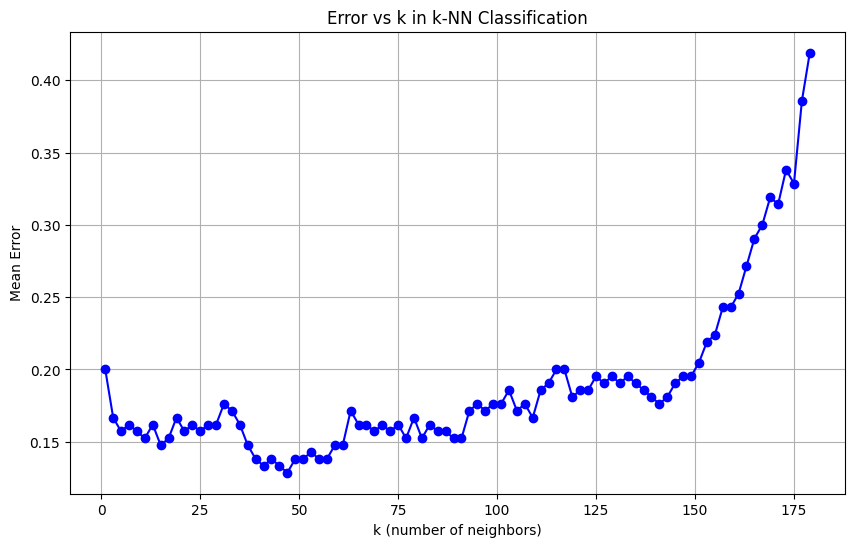

In [27]:
# Nothing to do here - just run this cell!
plot_error_vs_k(error_holder, m)

<h3 style="color:rgb(210,90,80)">Question 3.5 (2.5 Points):</h3>

***Answer the following questions about the plot you just created:***<br>

What range for $k$ holds the lowest errors (on average) - by visual inspection?<br>

l_) [0,5]<br>
m_) [50,60]<br>
n_) [150,175]<br>

Is the error larger for $k=175$ or for $k=1$?<br>

o_) 175<br>
p_) 1<br>

In [28]:
# YOUR CODE HERE
l_ = False  # [0,5] range
m_ = True   # [50,60] range
n_ = False  # [150,175] range
o_ = True   # k=175 has larger error
p_ = False  # k=1 has smaller error


In [29]:
assert l_ is not None, "Store True/False!"
assert l_ in [True, False], "Invalid Answer!"

In [30]:
assert m_ is not None, "Store True/False!"
assert m_ in [True, False], "Invalid Answer!"

In [31]:
assert n_ is not None, "Store True/False!"
assert n_ in [True, False], "Invalid Answer!"

In [32]:
assert o_ is not None, "Store True/False!"
assert o_ in [True, False], "Invalid Answer!"

In [33]:
assert p_ is not None, "Store True/False!"
assert p_ in [True, False], "Invalid Answer!"

<h3 style="color:rgb(210,90,80)">Question 3.6 (10 Points):</h3>

<i><b>Thinking of model complexity as the ability of the model to fit to noise, what choice of $k$ leads to complex models? Why?</b></i><br>
(Multiple answers might be correct)

q_) Model complexity increases with increasing $k$, as larger $k$ means the model has more parameters. <br>
r_) Model complexity increases with increasing $k$, as larger $k$ means that more neighbors influence the decision. <br>
s_) Model complexity increases with decreasing $k$, as smaller $k$ means that fewer neighbors influence the decision. <br>
t_) Model complexity increases with decreasing $k$, as smaller $k$ means the model has fewer parameters. <br>

u_) Very small values of $k$ lead to underfitting <br>
v_) Very small values of $k$ lead to overfitting <br>
w_) Very large values of $k$ lead to underfitting <br>
x_) Very large values of $k$ lead to overfitting <br>

In [34]:
# YOUR CODE HERE
q_ = False  # Model complexity does NOT increase with increasing k
r_ = False  # Model complexity does NOT increase with increasing k
s_ = True   # Model complexity DOES increase with decreasing k
t_ = False  # Model complexity is not related to number of parameters
u_ = False  # Small k leads to overfitting, not underfitting
v_ = True   # Small k leads to overfitting
w_ = True   # Large k leads to underfitting
x_ = False  # Large k does not lead to overfitting

In [35]:
assert q_ is not None, "Store True/False!"
assert q_ in [True, False], "Invalid Answer!"

In [36]:
assert r_ is not None, "Store True/False!"
assert r_ in [True, False], "Invalid Answer!"

In [37]:
assert s_ is not None, "Store True/False!"
assert s_ in [True, False], "Invalid Answer!"

In [38]:
assert t_ is not None, "Store True/False!"
assert t_ in [True, False], "Invalid Answer!"

In [39]:
assert u_ is not None, "Store True/False!"
assert u_ in [True, False], "Invalid Answer!"

In [40]:
assert v_ is not None, "Store True/False!"
assert v_ in [True, False], "Invalid Answer!"

In [41]:
assert w_ is not None, "Store True/False!"
assert w_ in [True, False], "Invalid Answer!"

In [42]:
assert x_ is not None, "Store True/False!"
assert x_ in [True, False], "Invalid Answer!"

<h2 style="color:rgb(0,120,170)">Task 4: Adding noise to dataset</h2>

To make things more interesting, mix up the dataset a bit:

* Implement `generate_flip_vector` which should return a 1-dimensional array of length $n$ where exactly $\left \lfloor{n/5}\right \rfloor $ entries are $-1$ and the rest are $+1$. The entries in the array should appear in a random order (hint: first create a numpy array containing all +1 values and then all -1 values and use the following function to shuffle the flip vector: [np.random.shuffle](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.shuffle.html)).
* Now implement `flip_labels` that flips the labels according to the flip vector.


Then perform the same steps as before. Generate the following 4 subplots in one big plot:  
(1) top left: visualize the original dataset (with data points colored differently according to the binary labels)  
(2) top right: visualize the flipped dataset (with data points colored differently according to the binary labels)  
(3) bottom left: visualize the mean error for $k \in \{1,3,5,...,177,179\}$ (same as in Task 2) for the original dataset  
(4) bottom right: visualize the mean error for $k \in \{1,3,5,...,177,179\}$ (same as in Task 2) for the flipped dataset  

plot the data and plot the error (estimated via the empirical risk) vs. $k$ for 10-fold cross validation.

<h3 style="color:rgb(210,90,80)">Code 4.1 (5 Points):</h3>

In [49]:
def generate_flip_vector(n: int) -> np.ndarray:
    """Function that produces a flip vector consisting of -1's and 1's.

    Parameters
    ----------
    n : integer
        The length of the vector that should be returned.

    Returns
    -------
    flip_vector : np.ndarray
        The vector that indicates what labels will be flipped
    """
    # YOUR CODE HERE
    # Calculate how many -1s we need (floor of n/5)
    num_flips = n // 5
    
    flip_vector = np.array([1] * (n - num_flips) + [-1] * num_flips)
    
    np.random.shuffle(flip_vector)
    
    return flip_vector

In [50]:
# DO NOT DELETE THIS CELL!
_expected_flip_vector1 = np.array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1, -1])

np.random.seed(0)
_flip1 = generate_flip_vector(len(y))
assert isinstance(_flip1, np.ndarray), "Flip vector is not a numpy array!"
np.testing.assert_array_equal(_expected_flip_vector1, _flip1)

<h3 style="color:rgb(210,90,80)">Code 4.2 (5 Points):</h3>

In [52]:
def flip_labels(y: np.ndarray, flip_vector: np.ndarray):
    """Function that flips labels given a flip vector.

    Parameters
    ----------
    y : np.ndarray
        Labels to flip. Note that y is of the same length as the flip vector.
    flip_vector : np.ndarray
        Array that should be used to flip the labels.

    Returns
    -------
    flipped_labels : np.ndarray
        The labels where roughly n/5 labels are flipped.
    """
    # YOUR CODE HERE
    if len(y) != len(flip_vector):
        raise ValueError("Label and flip vector lengths should match")
    flipped_labels=[]
    for i in range(len(y)):
        flipped_labels.append(y[i]*flip_vector[i])
    flipped_labels= np.array(flipped_labels)
    return flipped_labels

In [53]:
# DO NOT DELETE THIS CELL!
np.random.seed(0)
_y_fl1 = flip_labels(y, _expected_flip_vector1)
_expected_flipped_labels1 = np.array([ 1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,
        1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
       -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,
        1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
        1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
       -1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,
       -1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1.,
        1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,
        1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,
       -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,
       -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,
        1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,
       -1.,  1.])
assert isinstance(_y_fl1, np.ndarray), "Flipped labels is not a numpy array!"
np.testing.assert_array_equal(_expected_flipped_labels1, _y_fl1)

In [54]:
# Nothing to do here - just run this cell!
# define new y vector by calling flip function
fl_vec = generate_flip_vector(len(y))
y_fl = flip_labels(y,fl_vec)

error_holder_flipped = []
for k in m: # range with 179 included and step of 2
    error_holder_flipped.append(run_kNN(X, y_fl, train_kNN, eval_kNN, mean_zero_one_loss, nf, k))

<h3 style="color:rgb(210,90,80)">Plot 4.3 (4 Points):</h3>

In [55]:
def plot_subplots(X: np.ndarray, y: np.ndarray, y_fl: np.ndarray, m: int, error_holder: list[float], error_holder_flipped: list[float]):
    """The function creating the plots as described above.

    The Parameters are called the same as in the notebook.
    Do not use anything besides them.

    Parameters
    ----------
    X : np.ndarray
        The data to plot.
    y : np.ndarray
        The original labels of the data.
    y_fl : np.ndarray
        The flipped labels of the data.
    m : range
        The range of the error_holder lists.
    error_holder : list[float]
        The list containing the original errors.
    error_holder_flipped : list[float]
        The list containing the errors on the fipped dataset labels.  
    """
    # YOUR CODE HERE
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Top-left: Scatter plot of the original dataset
    axes[0, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o', label="Original Labels")
    axes[0, 0].set_title("Original Dataset")
    axes[0, 0].set_xlabel("x1")
    axes[0, 0].set_ylabel("x2")

    # Top-right: Scatter plot of the flipped dataset
    axes[0, 1].scatter(X[:, 0], X[:, 1], c=y_fl, cmap='bwr', marker='o', label="Flipped Labels")
    axes[0, 1].set_title("Flipped Dataset")
    axes[0, 1].set_xlabel("x1")
    axes[0, 1].set_ylabel("x2")

    axes[1, 0].plot(m, error_holder, color="blue", marker="o")
    axes[1, 0].set_title("Mean Error vs k (Original Dataset)")
    axes[1, 0].set_xlabel("k")
    axes[1, 0].set_ylabel("Mean Error")

    axes[1, 1].plot(m, error_holder_flipped, color="red", marker="o")
    axes[1, 1].set_title("Mean Error vs k (Flipped Dataset)")
    axes[1, 1].set_xlabel("k")
    axes[1, 1].set_ylabel("Mean Error")

    plt.tight_layout()
    plt.show()

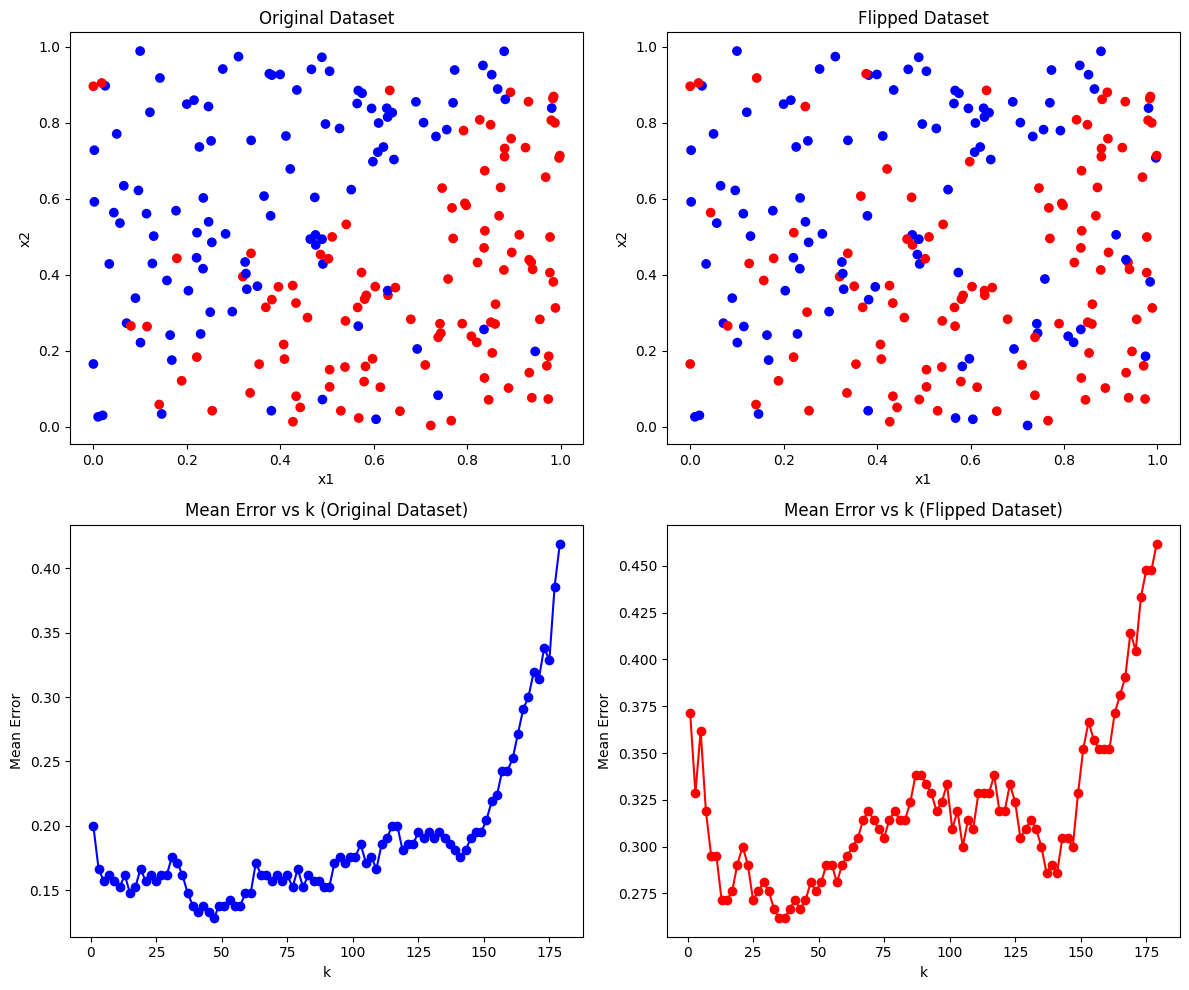

In [56]:
# Nothing to do here - just run this cell!
plot_subplots(X, y, y_fl, m, error_holder, error_holder_flipped)

<h3 style="color:rgb(210,90,80)">Question 4.3 (6 Points):</h3>

***Which differences do you observe?<br>
Which conclusions do you draw from that?***
<br>(Multiple answers might be correct)


y_) After flipping, the two classes are well separable and have nearly no overlap anymore <br>
z_) After flipping, the two classes are less separable (than before) and have a larger overlap (than before) <br>

a2_) Random label flipping brings noise into the data <br>
b2_) Random label flipping simply swaps data, but does not add noise <br>

c2_) Overall, the error remains nearly unchanged compared to the original data set. <br>
d2_) Overall, the error increases compared to the original data set. <br>

To answer the question assign to variables in the next cell "True" or "False" boolean values. To earn points, assign values to all variables. Note: Do not reuse these variable names. They are used for testing.

In [57]:
# YOUR CODE HERE
y_ = False
z_ = True

a2_ = True
b2_ = False

c2_ = False
d2_ = True

In [58]:
assert y_ is not None, "Store True/False!"
assert y_ in [True, False], "Invalid Answer!"

In [59]:
assert z_ is not None, "Store True/False!"
assert z_ in [True, False], "Invalid Answer!"

In [60]:
assert a2_ is not None, "Store True/False!"
assert a2_ in [True, False], "Invalid Answer!"

In [61]:
assert b2_ is not None, "Store True/False!"
assert b2_ in [True, False], "Invalid Answer!"

In [62]:
assert c2_ is not None, "Store True/False!"
assert c2_ in [True, False], "Invalid Answer!"

In [63]:
assert d2_ is not None, "Store True/False!"
assert d2_ in [True, False], "Invalid Answer!"

<h2 style="color:rgb(0,120,170)">Task 5: k-NN in higher dimensions</h2>

Going back to unflipped labels: Write a function `add_features(X)` which will add 4 additional features $x_3,x_4,x_5,x_6$ to the matrix X, calling the resulting matrix `X_new`. Each of the new features should be uniformly distributed between $0$ and $1$.<br>

As before, plot the error versus $k$ for 10-folds CV with 1, 2, 3, 4 incrementally added features. (4 plots) <br>

Additionally, for the particular choice $k=11$, plot the mean error versus $f$ with $f = 2,3,4,5,6$ being the number of features. Thus, the first data point in this plot (where $f=2$) shows the error for the original feature matrix X without extra dimensions. The second data point in this plot (where $f=3$) shows the error for the feature matrix X with one additional dimension, and so on.<br>

<h3 style="color:rgb(210,90,80)">Code 5.1 (10 Points):</h3>

In [70]:
def add_features(X: np.ndarray) -> np.ndarray:
    """Function that adds uniformly distributed features to dataset.

    Parameters
    ----------
    X : np.ndarray
        Dataset to add random feature

    Returns
    -------
    X_new : np.ndarray
        Dataset enhanced with 4 uniformly distributed features.
    """
    
    # YOUR CODE HERE
    # Get number of samples
    n_samples = X.shape[0]
    
    # Create 4 new random features (uniformly distributed between 0 and 1)
    new_features = np.random.uniform(0, 1, size=(n_samples, 4))
    
    # Concatenate original features with new features
    X_new = np.hstack((X, new_features))
    
    return X_new


In [71]:
assert isinstance(add_features(X), np.ndarray), "Resulting data matrix is not a numpy array!"
assert add_features(X).shape == (X.shape[0], 6), "Resulting data matrix shape is not correct!"

In [72]:
# Nothing to do here - just run this cell!
# define new feature matrix by calling add_features function
X_new = add_features(X)

<h3 style="color:rgb(210,90,80)">Plot 5.2 (10 Points):</h3>

In [90]:
def plot_error_vs_k_extra_dims(X_new: np.ndarray, y: np.ndarray, m: range):
    """Function that implements the plot from Task5.

    This function should create 2! plots.
    The first plot to visualize error vs k with 10 folds and <X> extra dimensions.
    The second plot to visualize the error versus dimension with k=11
    
    Parameters
    ----------
    X_new : np.ndarray
        The new dataset with the added random features.
    y : np.ndarray
        The labels of the dataset.
    m : range
        The range of the error_holder lists for the new errors.
    """
    # YOUR CODE HERE
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 10))
    
    # Part 1: Plot error vs k for different numbers of features
    for i in range(4):
        num_features = i + 3  # Start with 3 features (original 2 + 1 extra)
        X_subset = X_new[:, :num_features]  # Take subset of features
        
        # Calculate errors for different k values
        errors = []
        for k in m:
            error = run_kNN(X_subset, y, train_kNN, eval_kNN, mean_zero_one_loss, 10, k)
            errors.append(error)
        
        # Create subplot
        plt.subplot(2, 2, i + 1)
        plt.plot(m, errors, 'b-', marker='o', markersize=3)
        plt.title(f'Error vs k with {i + 1} extra dimension{"s" if i > 0 else ""}')
        plt.xlabel('k')
        plt.ylabel('Mean Error')
        plt.grid(True)
    
    # Adjust layout of first 4 subplots
    plt.tight_layout()
    
    # Part 2: Create separate figure for error vs dimensions plot
    plt.figure(figsize=(8, 6))
    
    # Calculate error for each number of features with k=11
    dim_errors = []
    for dim in range(2, 7):  # 2 to 6 features
        X_subset = X_new[:, :dim]
        error = run_kNN(X_subset, y, train_kNN, eval_kNN, mean_zero_one_loss, 10, 11)
        dim_errors.append(error)
    
    # Plot error vs number of features
    plt.plot(range(2, 7), dim_errors, 'r-', marker='o')
    plt.title('Error vs Number of Features (k=11)')
    plt.xlabel('Number of Features')
    plt.ylabel('Mean Error')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

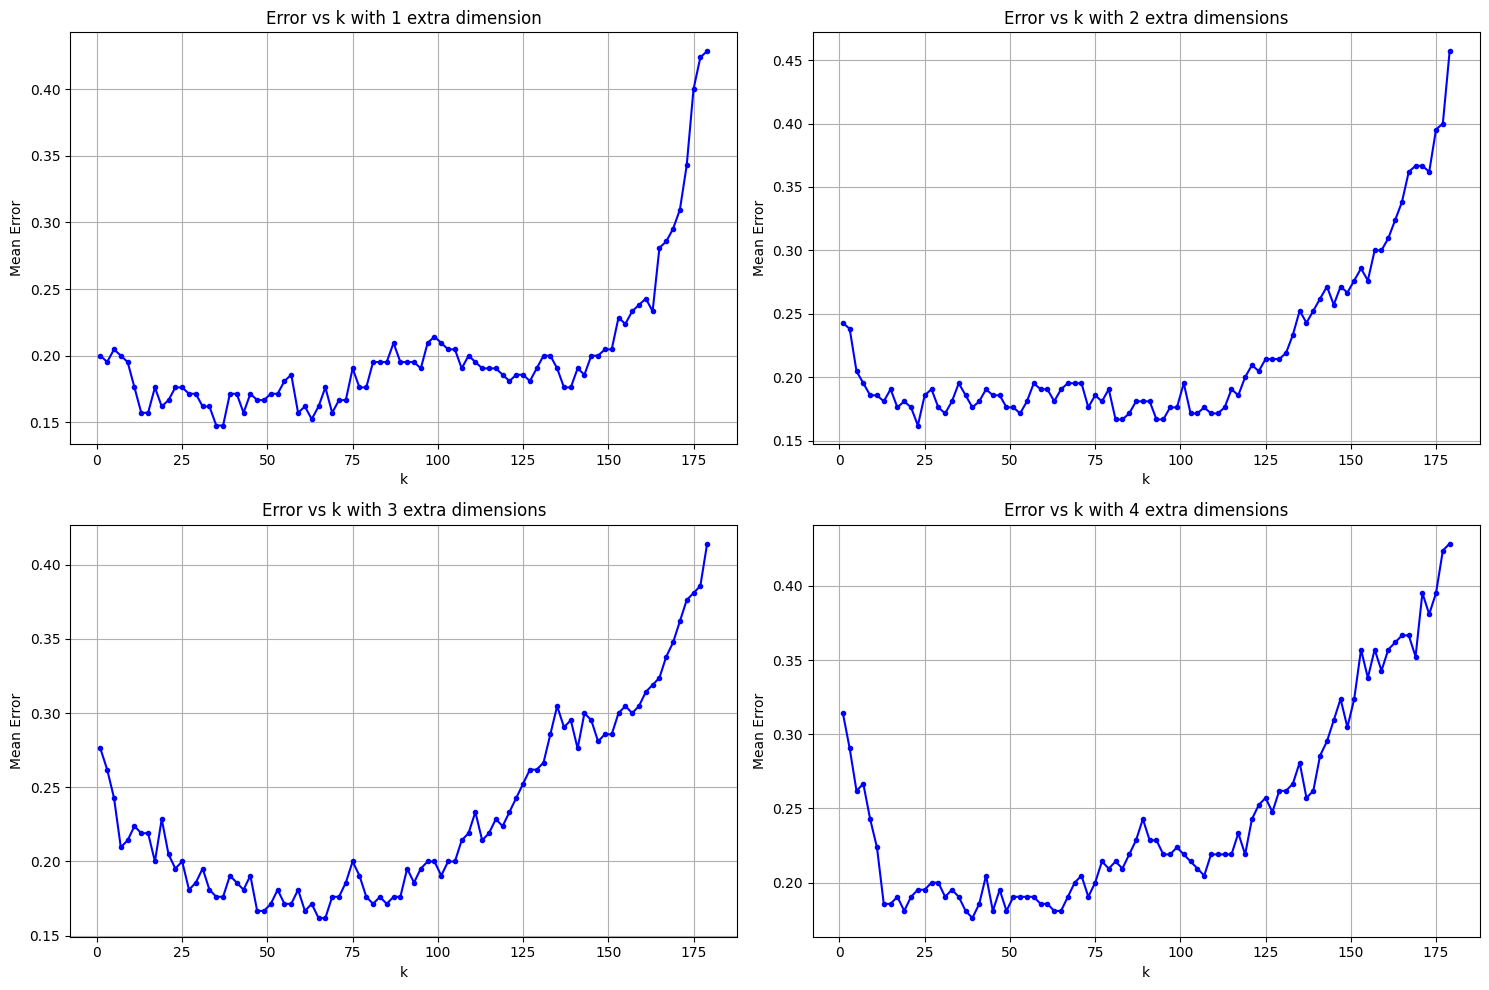

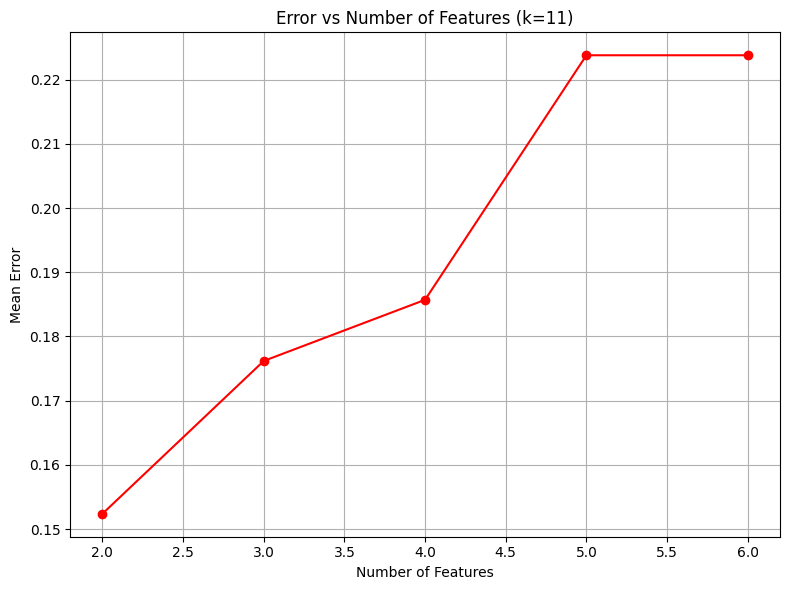

In [91]:
# Nothing to do here - just run this cell!
plot_error_vs_k_extra_dims(X_new, y, m)

<h3 style="color:rgb(210,90,80)">Question 5.2 (5 Points):</h3>

***Try to explain possible changes of the error.***

e2_) $k$-nearest neighbors is robust against randomly added further features; noise is filtered out <br>
f2_) $k$-nearest neighbors is not robust aginst randomly added further features; the error increases if extra dimension(s) with noise are added

g2_) The error with additional features ($f \ge 3$) is overall larger than for $f=2$<br>
h2_) The error with additional features ($f \ge 3$) is overall smaller than for $f=2$<br>
i2_) The error stays overall the same with additional features

In [76]:
# YOUR CODE HERE
e2_ = False
f2_ = True

g2_ = True
h2_ = False
i2_ = False

In [77]:
assert e2_ is not None, "Store True/False!"
assert e2_ in [True, False], "Invalid Answer!"

In [78]:
assert f2_ is not None, "Store True/False!"
assert f2_ in [True, False], "Invalid Answer!"

In [79]:
assert g2_ is not None, "Store True/False!"
assert g2_ in [True, False], "Invalid Answer!"

In [80]:
assert h2_ is not None, "Store True/False!"
assert h2_ in [True, False], "Invalid Answer!"

In [81]:
assert i2_ is not None, "Store True/False!"
assert i2_ in [True, False], "Invalid Answer!"